In [19]:
var openDigger = require('../src/open_digger');

In [20]:
var query = openDigger.driver.clickhouse.query;
query(    
    `SHOW DATABASES`
)
    .then(res=>{    
    console.log(res);
})

[
  { name: '_temporary_and_external_tables' },
  { name: 'default' },
  { name: 'github_log' },
  { name: 'system' }
]


In [21]:
query(    
    `SHOW TABLES from github_log`
)
    .then(res=>{    
    console.log(res);
})

[ { name: 'events' } ]


In [22]:
//展示表结构
query(    
    `DESC TABLE github_log.events`
)
    .then(res=>{    
    console.log(res);
})

[
  {
    name: 'id',
    type: 'UInt64',
    default_type: '',
    default_expression: '',
    comment: '',
    codec_expression: '',
    ttl_expression: ''
  },
  {
    name: 'type',
    type: "Enum8('CommitCommentEvent' = 1, 'CreateEvent' = 2, 'DeleteEvent' = 3, 'ForkEvent' = 4, 'GollumEvent' = 5, 'IssueCommentEvent' = 6, 'IssuesEvent' = 7, 'MemberEvent' = 8, 'PublicEvent' = 9, 'PullRequestEvent' = 10, 'PullRequestReviewCommentEvent' = 11, 'PushEvent' = 12, 'ReleaseEvent' = 13, 'WatchEvent' = 14, 'PullRequestReviewEvent' = 15)",
    default_type: '',
    default_expression: '',
    comment: '',
    codec_expression: '',
    ttl_expression: ''
  },
  {
    name: 'action',
    type: "Enum8('added' = 1, 'closed' = 2, 'created' = 3, 'labeled' = 4, 'opened' = 5, 'published' = 6, 'reopened' = 7, 'started' = 8)",
    default_type: '',
    default_expression: '',
    comment: '',
    codec_expression: '',
    ttl_expression: ''
  },
  {
    name: 'actor_id',
    type: 'UInt64',
    default_

In [23]:
//该项目在2018.11进行了一次项目名称的变更
query(    
    `select distinct repo_name,toYYYYMM(created_at) 
    from github_log.events where repo_id=22542759`  
)
    .then(res=>{    
    console.log(res);
})

[
  { repo_name: 'caskdata/cdap', 'toYYYYMM(created_at)': 201501 },
  { repo_name: 'caskdata/cdap', 'toYYYYMM(created_at)': 201502 },
  { repo_name: 'caskdata/cdap', 'toYYYYMM(created_at)': 201503 },
  { repo_name: 'caskdata/cdap', 'toYYYYMM(created_at)': 201504 },
  { repo_name: 'caskdata/cdap', 'toYYYYMM(created_at)': 201505 },
  { repo_name: 'caskdata/cdap', 'toYYYYMM(created_at)': 201506 },
  { repo_name: 'caskdata/cdap', 'toYYYYMM(created_at)': 201507 },
  { repo_name: 'caskdata/cdap', 'toYYYYMM(created_at)': 201508 },
  { repo_name: 'caskdata/cdap', 'toYYYYMM(created_at)': 201509 },
  { repo_name: 'caskdata/cdap', 'toYYYYMM(created_at)': 201510 },
  { repo_name: 'caskdata/cdap', 'toYYYYMM(created_at)': 201511 },
  { repo_name: 'caskdata/cdap', 'toYYYYMM(created_at)': 201512 },
  { repo_name: 'caskdata/cdap', 'toYYYYMM(created_at)': 201601 },
  { repo_name: 'caskdata/cdap', 'toYYYYMM(created_at)': 201602 },
  { repo_name: 'caskdata/cdap', 'toYYYYMM(created_at)': 201603 },
  { repo

In [24]:
//事件类型
query(    
    `select distinct type
    from github_log.events where repo_id=22542759`  
)
    .then(res=>{    
    console.log(res);    
})

[
  { type: 'CommitCommentEvent' },
  { type: 'CreateEvent' },
  { type: 'DeleteEvent' },
  { type: 'ForkEvent' },
  { type: 'IssueCommentEvent' },
  { type: 'PullRequestEvent' },
  { type: 'PushEvent' },
  { type: 'PullRequestReviewCommentEvent' },
  { type: 'ReleaseEvent' },
  { type: 'WatchEvent' },
  { type: 'MemberEvent' }
]


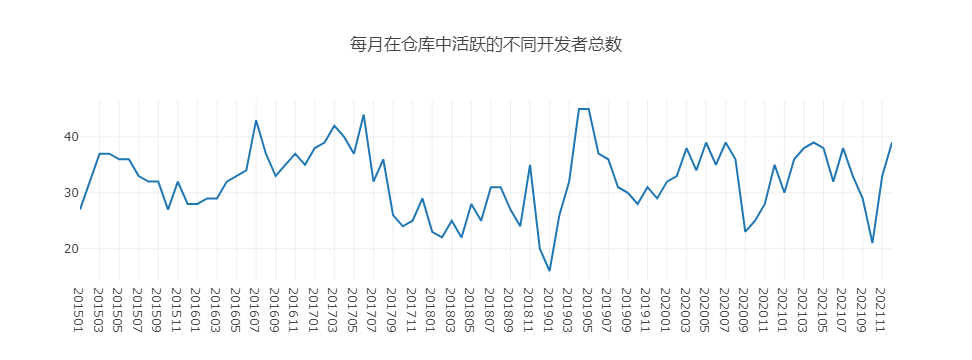

In [25]:
//4-曲线图
query(   
        `select count(distinct actor_id) AS actor_id_count,toYYYYMM(created_at) AS month
                from github_log.events
                where repo_id=22542759
                and month < 202201
                group by month
                order by month`
        
).then(data=>{    
    var activeCount=[],yMonth=[];
    data.forEach(item=>{yMonth.push(item.month);activeCount.push(item.actor_id_count);})    
    openDigger.render.plotly([{x: yMonth, y: activeCount, mode: 'scatter', name: '用户数量'}],
                             {title: '每月在仓库中活跃的不同开发者总数',xaxis: {type: 'category'}});
})

In [26]:
//4-表格
query(   
        `select count(distinct actor_id) AS actor_id_count,toYYYYMM(created_at) AS month
                from github_log.events
                where repo_id=22542759
                and month <202201
                group by month
                order by month`
        
).then(data=>{
    var list=[];
    data.forEach(item=>{
            list.push(item);
    });
    console.table(list.map((p, i) => {
        return {
            '月份': p.month,
            '该月仓库中活跃的不同开发者总数': p.actor_id_count
             };
    }))
})

┌─────────┬────────┬────────────────────────────────┐
│ (index) │  月份  │ 该月仓库中活跃的不同开发者总数 │
├─────────┼────────┼────────────────────────────────┤
│    0    │ 201501 │              '27'              │
│    1    │ 201502 │              '32'              │
│    2    │ 201503 │              '37'              │
│    3    │ 201504 │              '37'              │
│    4    │ 201505 │              '36'              │
│    5    │ 201506 │              '36'              │
│    6    │ 201507 │              '33'              │
│    7    │ 201508 │              '32'              │
│    8    │ 201509 │              '32'              │
│    9    │ 201510 │              '27'              │
│   10    │ 201511 │              '32'              │
│   11    │ 201512 │              '28'              │
│   12    │ 201601 │              '28'              │
│   13    │ 201602 │              '29'              │
│   14    │ 201603 │              '29'              │
│   15    │ 201604 │              '32'       

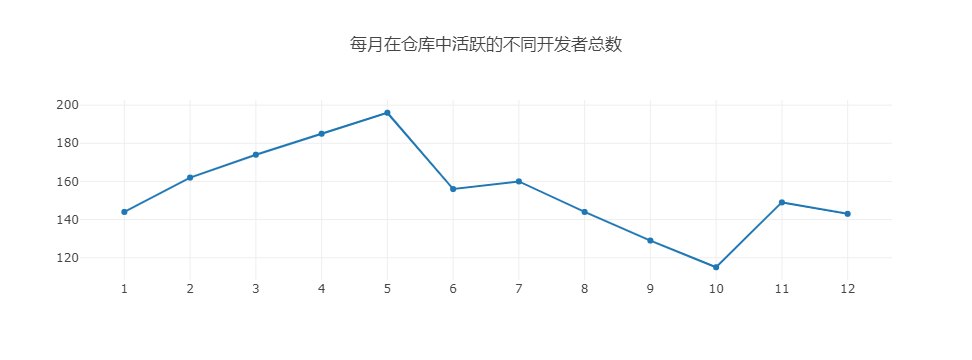

In [27]:
//4-曲线图2
query(   
        `select count(distinct actor_id) AS actor_id_count,toMonth(created_at) AS month
                from github_log.events
                where repo_id=22542759
                and month < 2022
                group by month
                order by month`
        
).then(data=>{    
    var activeCount=[],yMonth=[];
    data.forEach(item=>{yMonth.push(item.month);activeCount.push(item.actor_id_count);})    
    openDigger.render.plotly([{x: yMonth, y: activeCount, mode: 'scatter', name: '用户数量'}],
                             {title: '每月在仓库中活跃的不同开发者总数',xaxis: {type: 'category'}});
})

In [28]:
//4-表格2
query(   
        `select count(distinct actor_id) AS actor_id_count,toMonth(created_at) AS month
                from github_log.events
                where repo_id=22542759
                and month <202201
                group by month
                order by month`
        
).then(data=>{
    var list=[];
    data.forEach(item=>{
            list.push(item);
    });
    console.table(list.map((p, i) => {
        return {
            '月份': p.month,
            '该月仓库中活跃的不同开发者总数': p.actor_id_count
             };
    }))
})

┌─────────┬──────┬────────────────────────────────┐
│ (index) │ 月份 │ 该月仓库中活跃的不同开发者总数 │
├─────────┼──────┼────────────────────────────────┤
│    0    │  1   │             '144'              │
│    1    │  2   │             '162'              │
│    2    │  3   │             '174'              │
│    3    │  4   │             '185'              │
│    4    │  5   │             '196'              │
│    5    │  6   │             '156'              │
│    6    │  7   │             '160'              │
│    7    │  8   │             '144'              │
│    8    │  9   │             '129'              │
│    9    │  10  │             '115'              │
│   10    │  11  │             '149'              │
│   11    │  12  │             '143'              │
└─────────┴──────┴────────────────────────────────┘


In [29]:
//6添加平均数、中位数
query(
           `select issue_number,dateDiff('day',issue_created_at,pull_merged_at) AS length
                from github_log.events
                where repo_id=22542759 
                and type='PullRequestEvent'
                and pull_merged = 1
                and toYYYYMM(pull_merged_at)<202201
            `
).then(data=>{
    var list=[];
    data.forEach(item=>{
            list.push(Number(item.length))
    });
    
    list.sort();
    var mid_value,mid_index,sum,average;
    mid_index=list.length/2;
    sum=0;
    if(list.length%2==0){         
        mid_value=(list[mid_index]+list[mid_index+1])/2;
    }else{
        mid_index=(list.length-1)/2;
        mid_value=list[mid_index];
    }
    for(var i=0;i<list.length;i++){
        sum+=list[i];
    }
    average=sum/list.length;
    // console.log(list.length);
    // console.log(mid_index);
    //console.log('sum'+sum);
    console.log('average:'+average);
    console.log('mid_value:'+mid_value);
});

average:2.4766540317022745
mid_value:1


In [30]:
//7-issue
query(
       `select issue_number,min(dateDiff('day',issue_created_at,issue_comment_created_at)) AS length      
           from github_log.events 
                where repo_id=22542759
                and type in ('IssueCommentEvent')
                and issue_author_id <> issue_comment_author_id
                and toYYYYMM(issue_comment_created_at)<202201
                group by issue_number
            `
).then(data=>{
    var list=[];
    data.forEach(item=>{
            list.push(Number(item.length))
    });
    
    list.sort();
    var mid_value,mid_index,sum,average;
    mid_index=list.length/2;
    sum=0;
    if(list.length%2==0){         
        mid_value=(list[mid_index]+list[mid_index+1])/2;
    }else{
        mid_index=(list.length-1)/2;
        mid_value=list[mid_index];
    }
    for(var i=0;i<list.length;i++){
        sum+=list[i];
    }
    average=sum/list.length;
    //console.log(list);
    //console.log("sum"+sum);
    console.log('average:'+average);
    console.log('mid_value:'+mid_value);
});

average:1.8720748829953198
mid_value:0


In [31]:
//7-pr
query(`select issue_number as pr_number,min(dateDiff('day',issue_created_at,pull_review_comment_created_at))  AS length    
           from github_log.events
                where repo_id=22542759
                and type in ('PullRequestReviewCommentEvent')
                and pull_review_comment_author_id <> issue_author_id
                and toYYYYMM(pull_review_comment_created_at)<202201
                group by issue_number`
).then(data=>{
    var list=[];
    data.forEach(item=>{
            list.push(Number(item.length))
    });
    
    list.sort();
    var mid_value,mid_index,sum,average;
    mid_index=list.length/2;
    sum=0;
    if(list.length%2==0){         
        mid_value=(list[mid_index]+list[mid_index+1])/2;
    }else{
        mid_index=(list.length-1)/2;
        mid_value=list[mid_index];
    }
    for(var i=0;i<list.length;i++){
        sum+=list[i];
    }
    average=sum/list.length;
    //console.log(list);
    //console.log("sum"+sum);
    console.log('average:'+average);
    console.log('mid_value:'+mid_value);
});

average:1.262749898000816
mid_value:0


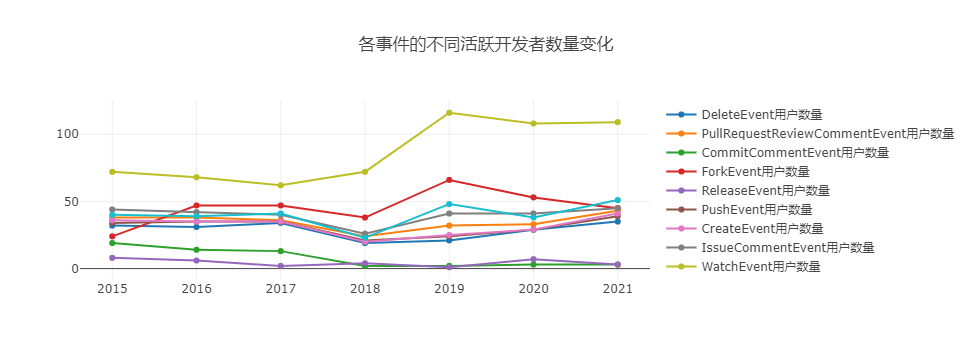

In [32]:
//各事件的不同活跃开发者数量变化
query(
    `select count(distinct actor_id) as number,type,toYear(created_at) as year from github_log.events
        where repo_id=22542759
        and year<2022
        group by year,type
        order by year`
).then(data=>{    
    var list_DeleteEvent=[],list_PullRequestReviewCommentEvent=[],list_CommitCommentEvent=[],list_ForkEvent=[],list_ReleaseEvent=[];
    var list_PushEvent=[],list_CreateEvent=[],list_IssueCommentEvent=[],list_WatchEvent=[],list_PullRequestEvent=[];
    var x_axis=[2015,2016,2017,2018,2019,2020,2021];
    data.forEach(item=>{
            switch(item.type){
                case 'DeleteEvent':list_DeleteEvent.push(Number(item.number));break;
                case 'PullRequestReviewCommentEvent':list_PullRequestReviewCommentEvent.push(Number(item.number));break;
                case 'CommitCommentEvent':list_CommitCommentEvent.push(Number(item.number));break;
                case 'ForkEvent':list_ForkEvent.push(Number(item.number));break;
                case 'ReleaseEvent':list_ReleaseEvent.push(Number(item.number));break;
                case 'PushEvent':list_PushEvent.push(Number(item.number));break;
                case 'CreateEvent':list_CreateEvent.push(Number(item.number));break;
                case 'IssueCommentEvent':list_IssueCommentEvent.push(Number(item.number));break;
                case 'WatchEvent':list_WatchEvent.push(Number(item.number));break;
                case 'PullRequestEvent':list_PullRequestEvent.push(Number(item.number));break;
            }
    });
    openDigger.render.plotly([{x: x_axis, y: list_DeleteEvent, mode: 'scatter', name: 'DeleteEvent用户数量'},
                             {x: x_axis, y: list_PullRequestReviewCommentEvent, mode: 'scatter', name: 'PullRequestReviewCommentEvent用户数量'},
                             {x: x_axis, y: list_CommitCommentEvent, mode: 'scatter', name: 'CommitCommentEvent用户数量'},
                             {x: x_axis, y: list_ForkEvent, mode: 'scatter', name: 'ForkEvent用户数量'},
                             {x: x_axis, y: list_ReleaseEvent, mode: 'scatter', name: 'ReleaseEvent用户数量'},
                             {x: x_axis, y: list_PushEvent, mode: 'scatter', name: 'PushEvent用户数量'},
                             {x: x_axis, y: list_CreateEvent, mode: 'scatter', name: 'CreateEvent用户数量'},
                             {x: x_axis, y: list_IssueCommentEvent, mode: 'scatter', name: 'IssueCommentEvent用户数量'},
                             {x: x_axis, y: list_WatchEvent, mode: 'scatter', name: 'WatchEvent用户数量'},
                             {x: x_axis, y: list_PullRequestEvent, mode: 'scatter', name: 'PullRequestEvent用户数量'}],
                             {title: '各事件的不同活跃开发者数量变化',xaxis: {type: 'category'}});
})